This problem was asked by Facebook.

Given the mapping a = 1, b = 2, ... z = 26, and an encoded message, count the number of ways it can be decoded.

For example, the message '111' would give 3, since it could be decoded as 'aaa', 'ka', and 'ak'.

You can assume that the messages are decodable. For example, '001' is not allowed.

In [48]:
def number_of_decodings(code):
    """ Returns the number of ways code can be decoded.
    This is solved by recursion in O(number_of_decodings) 
    time and O(1) space.
    Since the number_of_decodings can be up to O(2^n) in the
    worst case, this quickly becomes very slow. """

    if (len(code) <= 1):
        # assume all such codes are unambiguously decodable
        return 1
    
    # test if the current and next digit lead
    # to ambiguity, and if so branch out to 
    # consider both cases
    elif (
        # a '1' is ambiguous if followed by
        # a digit X=[1-9] since it could be
        # decoded as '1X' or '1'+'X'
        code[0]=='1' and 
        code[1] in [str(k) for k in (range(1,10))]
    ) or (
        # a '2' is ambiguous if followed by 
        # a digit X=[1-6] since it could be
        # decoded as '2X' or '2'+'X'
        code[0]=='2' and 
        code[1] in [str(k) for k in range(1,7)]
    ):
        # branch out due to ambiguity
        return (number_of_decodings(code[1:]) + 
                number_of_decodings(code[2:]))
    
    # if no ambiguity, just move on to next digit
    else:
        return number_of_decodings(code[1:])

def number_of_decodings_fast(code):
    """ Same as number_of_decodings(), but 
    dynamic programming implementation which runs in 
    O(n) time and O(1) space. 
    The implementation is very similar to the dynamic programming
    solution for the Fibonacci series. """
    length = len(code)
    if (length <= 1):
        # assume all such codes are unambiguously decodable
        return 1
    else:
        n_prev = 1 # len 0
        n_current = 1 # len 1
        for i in range(1,length):
            if (
                # a '1' is ambiguous if followed by
                # a digit X=[1-9] since it could be
                # decoded as '1X' or '1'+'X'
                code[i-1]=='1' and 
                code[1] in [str(k) for k in (range(1,10))]
            ) or (
                # a '2' is ambiguous if followed by 
                # a digit X=[1-6] since it could be
                # decoded as '2X' or '2'+'X'
                code[i-1]=='2' and 
                code[i] in [str(k) for k in range(1,7)]
            ):
                # New number of decodings is the sum of
                # decodings obtainable from the code two digits back
                # (code[0:(i-2)] + '[1-2]X' interpretation)
                # and decodings obtainable from the code one digit back
                # (code[0:(i-1)] + 'X' interpretation).
                n_new = n_prev + n_current
            else:
                # New number of decodings is the same as
                # that obtainable from the code one digit back
                # (code[0:(i-1)] + 'X' interpretation).
                n_new = n_current
            # update n_prev and n_current
            n_prev = n_current
            n_current = n_new
        return n_current

In [49]:
code = ""
assert number_of_decodings(code) == 1

In [50]:
code = "111"
assert number_of_decodings_fast(code) == 3

In [51]:
code = "11"
assert number_of_decodings_fast(code) == 2

In [52]:
code = "20"
assert number_of_decodings_fast(code) == 1

In [53]:
code = "29"
assert number_of_decodings_fast(code) == 1

In [54]:
code = "126"
assert number_of_decodings_fast(code) == 3

In [55]:
code = "1216"
assert number_of_decodings_fast(code) == 5

In [56]:
code = "12321"
assert number_of_decodings_fast(code) == 6

In [57]:
from timeit import default_timer as timer
import numpy as np
import pandas as pd
import math

def runtime(fun, arr):
    """ Return the execution time of fun with argument arr """
    start = timer()
#     print(fun(arr))
    res = fun(arr)
    end = timer()
    return (end-start, res)

def benchmark(fun, min_array_len=10, max_array_len=1e4, n=20):
    """ 
    Benchmark runtime of function fun with arrays of varying length. 
    Return a DataFrame specifying execution times in seconds for a
    set of array lengths.
    """
    bench_df = pd.DataFrame({
        'len': np.logspace(
            math.log10(min_array_len),
            math.log10(max_array_len),
            num=n,
            dtype=np.int32
        ),
        'execution_time': np.empty(n),
        'res': np.empty(n)
    })
    for i, n in enumerate(bench_df['len']):
#         arr = np.arange(1,n) # this leads to float64 overflow
        arr = ['1'] * n
        bench_df.at[i, 'execution_time'], bench_df.at[i, 'res'] = runtime(fun,arr)
    return bench_df

In [58]:
recursive_stats_df = benchmark(
    number_of_decodings,
    min_array_len=1,
    max_array_len=30
)

In [59]:
dynamicProg_stats_df = benchmark(
    number_of_decodings_fast,
    min_array_len=1,
    max_array_len=30
)

In [60]:
any(dynamicProg_stats_df['res'] != recursive_stats_df['res'])

False

Text(0.5, 1.0, 'decode dynamic prog')

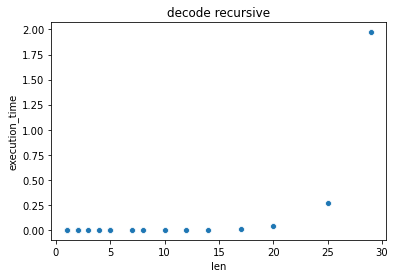

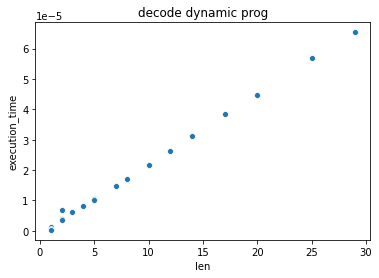

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
sns.scatterplot('len', 'execution_time', data=recursive_stats_df, ax=ax)
ax.set_title('decode recursive')

fig, ax = plt.subplots()
sns.scatterplot('len', 'execution_time', data=dynamicProg_stats_df, ax=ax)
ax.set_title('decode dynamic prog')